<a href="https://colab.research.google.com/github/aidot-kr/AISecurity/blob/master/5_OneHotEncode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding

- [scikit-learn을 사용한 One hot Encode]

In [2]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['seoul', 'cyber', 'go', 'seoul', 'University'] # 사용할 데이터 정의
values = array(data)

# 정수 인코딩을 통해서 인덱스 생성
label_encoder = LabelEncoder() 
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# 인덱스를 기준으로 바이러리 인코딩
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1) # 행과 열 재조정 
print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# 가장 큰 값을 가진 인덱스의 실제 데이터 조회
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[3 1 2 3 0]
[[3]
 [1]
 [2]
 [3]
 [0]]
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
['seoul']


- Kereas를 사용한 One-hot Encode 

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

samples = ['seoul', 'cyber', 'go', 'seoul', 'University'] # 사용할 데이터 정의

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer()
# 단어 인덱스를 구축합니다.
tokenizer.fit_on_texts(samples)
print('워드 인덱스:',tokenizer.word_index)
print('출현 빈도:',tokenizer.word_counts)

# 문자열을 정수 인덱스의 리스트로 변환합니다.
sequences = tokenizer.texts_to_sequences(samples)
print('정수 인덱스:',sequences)

# 원-핫 엔코딩 처리
encoded = to_categorical(sequences)
print(encoded)

워드 인덱스: {'seoul': 1, 'cyber': 2, 'go': 3, 'university': 4}
출현 빈도: OrderedDict([('seoul', 2), ('cyber', 1), ('go', 1), ('university', 1)])
정수 인덱스: [[1], [2], [3], [1], [4]]
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


- Sklearn의 CountVectorizer를 활용한 Bag of Words

In [4]:
from sklearn.feature_extraction.text import CountVectorizer 
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']
vectorizer = CountVectorizer() # 텍스트 문서 모음을 토큰 수 행렬로 변환
word_vectors = vectorizer.fit_transform(corpus)  # 어휘 사전을 기반으로  document-term matrix으로 반환
print("Index:", vectorizer.vocabulary_) 
print("Features:", vectorizer.get_feature_names())
print("Values: \n", word_vectors.toarray()) 

Index: {'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
Features: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Values: 
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## 엔코딩 후 모델 적용예시 - Naive Bayes(스팸분류)


1. 라이브러리 Import

In [1]:
import nltk #자연어 처리 패키지
from nltk.corpus import stopwords #NLTK에서 제공되는 불용어 사전
import string # Python  문자열 처리 클래스
import pandas as pd # 데이터분석 라이브러리

# 사이킷런(scikit-learn)의 model_selection 패키지 안에 train_test_split 모듈
# 손쉽게 train set(학습 데이터 셋)과 test set(테스트 셋)을 분리
from sklearn.model_selection import train_test_split 

# 여러과정의 전처리를 일괄처리
from sklearn.pipeline import Pipeline 

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터
from sklearn.feature_extraction.text import CountVectorizer 

# 카운트 행렬을 표준화 된 tf 또는 tf-idf 표현으로 변환
from sklearn.feature_extraction.text import TfidfTransformer

# naive_bayes 서브패키지
from sklearn.naive_bayes import MultinomialNB

# 사이킷런 성능 평가 패키지
from sklearn.metrics import classification_report,confusion_matrix

2. Dataset 다운로드 및 정제

1) 아래의 URL에서 DataSet 다운로드 가능
- https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [2]:
# 구글 드라이브와 연동
import os
print(os.getcwd())
!ls

/content
sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 마운트된 내 드라이브와 파일 확인
!ls

drive  sample_data


In [5]:
cd /content/drive/My\ Drive/AISecurity

/content/drive/My Drive/AISecurity


In [6]:
ls

2.TFIDF.ipynb           4_Pre_Processing.ipynb     Sample.ipynb
3.SimpleCrawling.ipynb  5.OneHotEncode.ipynb       spam.csv
4_MeCab.ipynb           5.Word2Vec-FastText.ipynb


In [7]:
messages = pd.read_csv('spam.csv', encoding='latin-1') # ISO-8859-1, 라틴1으로 엔코딩
messages.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


2) DataSet 컬럼 정제 (불필요한 컬럼 삭제, 컬럼명 변경)

In [8]:
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
messages = messages.rename(columns={'v1': 'class','v2': 'text'})
messages.head(10)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


3) DataSet 탐색적 데이터 분석
- 스팸 class가 약 15%이며, 중복된 메시지도 일부 존재함

In [9]:
messages.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

- 메시지 길이 분석: 햄(스팸아님)은 200자 이내, 스팸은 130자 이상의 값이 다수

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37fb99c828>,
      dtype=object)

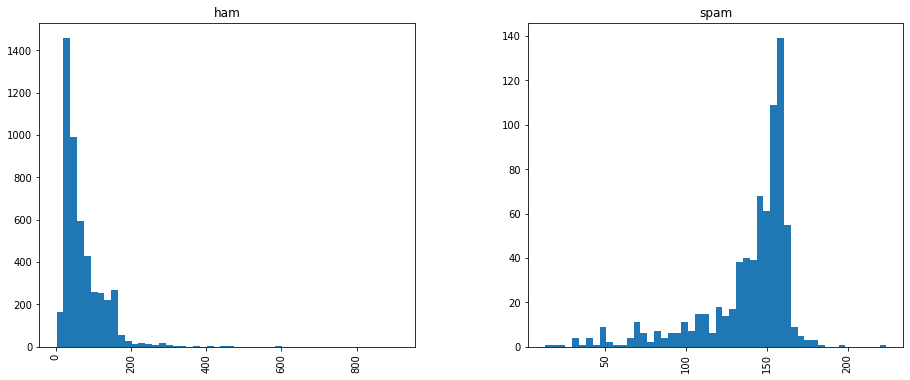

In [10]:
messages['length'] = messages['text'].apply(len) # 각 로우의 텍스트 길이를 계산하여 length 필드에 추가함
messages.hist(column='length',by='class',bins=50, figsize=(15,6))

- 특수기호(문자구분자), 불용어, 소문자 처리 함수

In [11]:
import nltk
nltk.download('stopwords')

def process_text(text):
    #1 문자 구분자 제거
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 불용어 제거
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 리스트 반환
    return clean_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
messages['text'].apply(process_text).head(10)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: text, dtype: object

3) 데이터 집합을 분할하여 기능 훈련 및 테스트 데이터 생성
- train_test_split함수를 사용하여 테스트 크기가 0.2인 테스트 데이터 생성
- random_state를 사용하여 동일한 값의 테스트 데이터 생성

In [13]:
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'],messages['class'],test_size=0.2, random_state = 15)

4) 사이킷런의 CountVectorizer를 통해 피처 생성
 - 사전에 정의한 함수인 'process_text'를 사용하여 토큰을 추출함
 - 각 문서에서 토큰의 출현 빈도 계산
 - 각 문서를 BOW 인코딩 벡터로 변환한다.

In [40]:
bow = CountVectorizer(analyzer=process_text)
train_data_features = bow.fit_transform(msg_train, class_train)
bow

CountVectorizer(analyzer=<function process_text at 0x7f59d96b5950>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# 각 문서의 토큰 카운트 확인
sorted(bow.vocabulary_.items(), key=lambda x:x[1], reverse=True)

5) 모델 적용 - PipeLine 적용하여 코드 간략화

- 공통적으로 들어있는 단어의 경우 가중치를 축소

- TfidfTransformer 파라미터

- norm='l2' 각 문서의 피처 벡터에 대한 정규화 방식 결정 
 .L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 구성, 기본 값
 .L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절

- smooth_idf=False 피처 생성시 0인 값에 대해 작은 값을 합한 스무딩 피처 구성여부 결정

- sublinear_tf=False TF (Term-Frequency, 단어빈도) 값의 스무딩(smoothing) 여부를 결정

- use_idf=True TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부

In [18]:
pipeline = Pipeline([
    ('count_vect',CountVectorizer(analyzer=process_text)), # 단어를 process_text 함수 처리 후 BoW전환
    ('tfidf',TfidfTransformer()), # TF-IDF로 변환
    ('classifier',MultinomialNB()) # TF-IDF vectors 를 베이즈정리 분류기로 학습
])

In [19]:
%time temp= pipeline.fit(msg_train,class_train)
print(temp)

CPU times: user 5.82 s, sys: 682 ms, total: 6.51 s
Wall time: 6.51 s
Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer=<function process_text at 0x7f37fb73d378>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha

In [20]:
predictions = pipeline.predict(msg_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [21]:
print(classification_report(class_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       983
        spam       1.00      0.67      0.81       132

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.96      1115

